<a href="https://colab.research.google.com/github/engcivilgabriel/Analysis-of-public-data/blob/master/Casas_Para_Alugar_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANÁLISE DE ALUGUEL DE CASAS NO BRASIL**

<center><img alt="rent" width="80%" src=https://conteudo.imguol.com.br/c/noticias/06/2020/07/03/imovel-financiamento-aluguel-1593808631898_v2_750x421.jpg></center>



**Observação:**
> Os dados a serem analisados foram disponibilizados no [Kaggle]('https://kaggle.com/') e coletados através de Webcrawler de informações abertas de um site imobiliário por Rubens Junior. Segundo o informado nas observações do dataset, este possui 10962 cadastros de casas para alugar com 13 classes diferentes e pode conter alguns valores que são considerados *outliers* para análise. Tendo em vista que foi utilizado um WebCrawler apenas para pegar os dados, os mesmos estão sujeitos a problemas como erros no cadastros.
---

## **Introdução**

Em um mundo cada vez mais urbano e desigual, se faz urgente o estabelecimento de relações locatícias mais justas e transparentes que atendam ambas as partes do contrato. Não apenas com o respaldo das leis, mas com a proatividade de uma sociedade que aprenda a resolver os seus conflitos e viver dignamente em paz.

## **Objetivo**

Neste contexto, **busca-se com esta análise estudar as ofertas locatícias nacionais e sua distribuição geográfica, bem como rascunhar um estimador de custo**.

## **Análise Exploratória de Dados (EDA)**

###Procedimentos Preliminares

Vamos começar instalando e importando as bibliotecas necessárias para manusear as informações do dataset.

In [132]:
#@title Instalando o GeoPandas
!pip install geopandas

In [133]:
#@title Importando bibliotecas necessárias
# Importando bibliotecas necessárias
from IPython.display import display, HTML # Funções de exibição
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_palette("colorblind") 
sns.set_style("darkgrid")

# Definir as opções de exibição do Pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Importar bibliotecas geoespaciais
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

###Importando Dataset

Com as bibliotecas devidamente declaradas e prontas para o uso, vamos agora importar nosso dataset e fazer uma pré-visualização das informações presentes na sua estrutura.

In [134]:
df = pd.read_csv("https://raw.githubusercontent.com/engcivilgabriel/Analysis-of-public-data/master/CSV/houses_to_rent_v2.csv", sep=',',parse_dates=True)
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


###Limpeza dos Dados

Com a pré-visualização do dataset, vamos agora entender suas características. Para isso, analisaremos as informações pertinentes às suas variáveis:

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Vemos que **o dataset apresenta 10.692 linhas e 13 colunas**, bem como não apresenta ausência de informações para nenhuma variável, o que é o ideal. Agora, através de uma olhada nos dados brutos fica evidente que, para uma melhor manipulação:

*   Os nomes das colunas deverão ser traduzidos para o idioma Português (BR)
*   Os nomes das colunas deverão ser limpos e padronizados; e,
*   Os dados deverão ser traduzidos para o idioma Português (BR).

In [136]:
# Traduzindo e formatando os nomes das colunas
df.columns = ["Cidade", 
"Área",
"Quartos",
"Banheiros",
"Vagas",
"Andar",
"Animais",
"Mobiliado",
"Condomínio (R$)",
"Aluguel (R$)",
"IPTU (R$)",
"Seguro Incêndio (R$)",
"Total (R$)"]

In [137]:
# Traduzindo dados da coluna Animais
animal = {"acept":"sim", "not acept":"não"}
df["Animais"] = df.Animais.map(animal)

# Traduzindo dados da coluna Mobiliado
mobilia = {"furnished":"sim", "not furnished":"não"}
df['Mobiliado'] = df['Mobiliado'].map(mobilia)

In [138]:
df.head()

,Cidade,Área,Quartos,Banheiros,Vagas,Andar,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
0,São Paulo,70,2,1,1,7,sim,sim,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,sim,não,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,sim,não,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,sim,não,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,não,não,0,800,25,11,836


###Análise de Recursos

Após o processo de limpeza e preparação dos dados, entende-se que o dataset está pronto para serem feitas as análises de variável. Vamos iniciar então fazendo análises estatísticas superficiais das variáveis presentes no conjunto de dados. Para isso, iniciaremos uma verificação descritiva das variáveis numéricas.

In [139]:
# ver o resumo estatístico das variáveis numéricas
df[['Área', 'Quartos', 'Banheiros', 'Andar',
    'Condomínio (R$)', 'Aluguel (R$)', 'IPTU (R$)', 'Seguro Incêndio (R$)', 'Total (R$)']].describe()

,Área,Quartos,Banheiros,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
count,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


Já de cara, percebemos que algumas variáveis apresentam valores máximos que podem indicar a presença de *outliers*. Vamos, então, analisar caso a caso a seguir através de histogramas.

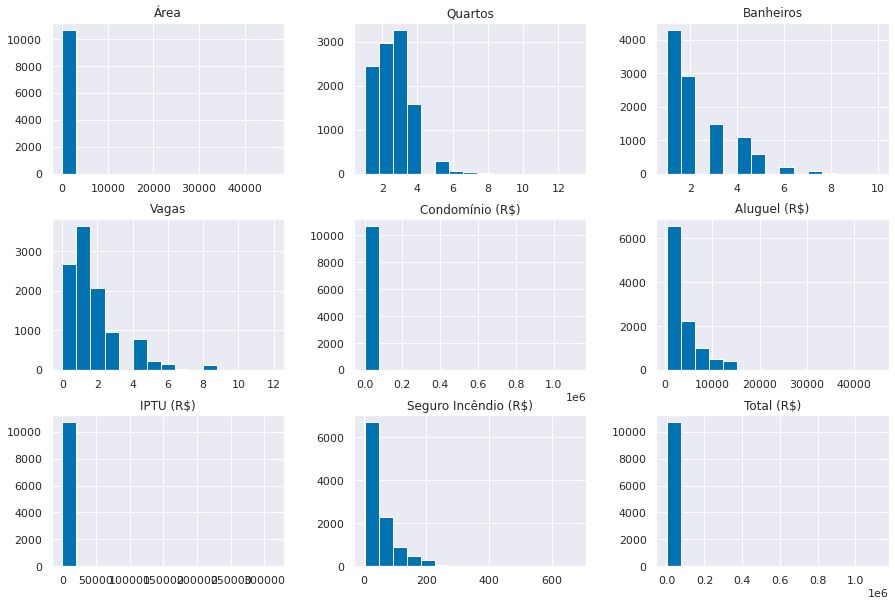

In [140]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Novamente, pode-se perceber que algumas variáveis apresentam *outliers* que estão impedindo a correta visualização dos dados, como é o caso das variáveis: Área, Condomínio, Aluguel, IPTU e, consequentemente, Total. Neste sentido, vamos nos aprofundar nessas variáveis para entender de onde vêm estas distorções.

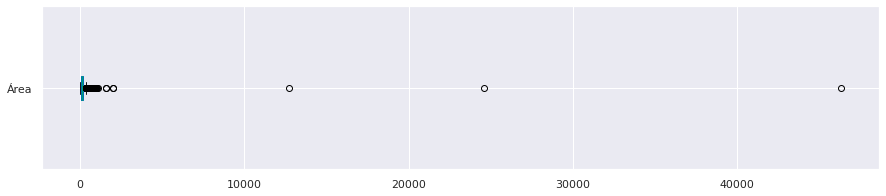

Área: valores acima de 750:
64 entradas
0.5986%


In [141]:
# área
df.Área.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 750 m² para área
print("Área: valores acima de 750:")
print("{} entradas".format(len(df[df.Área > 750])))
print("{:.4f}%".format((len(df[df.Área > 750]) / df.shape[0])*100))

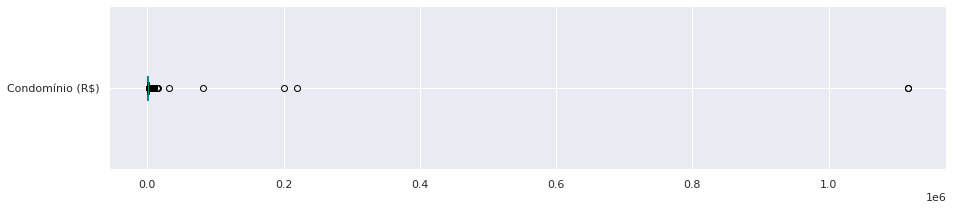

Condomínio: valores acima de R$ 6000:
58 entradas
0.5425%


In [142]:
# condomínio
df['Condomínio (R$)'].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de R$ 6000 para condomínio
print("Condomínio: valores acima de R$ 6000:")
print("{} entradas".format(len(df[df['Condomínio (R$)'] > 6000])))
print("{:.4f}%".format((len(df[df['Condomínio (R$)'] > 6000]) / df.shape[0])*100))

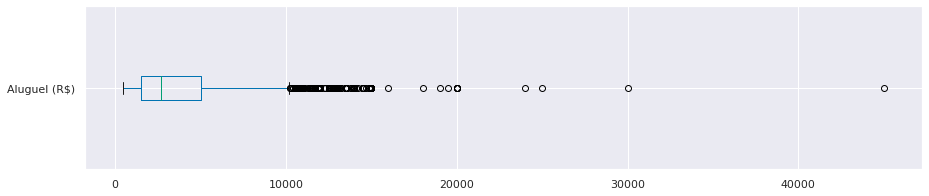

Aluguel: valores acima de R$ 10000:
727 entradas
6.7995%


In [143]:
# aluguel
df['Aluguel (R$)'].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de R$ 10000 para aluguel
print("Aluguel: valores acima de R$ 10000:")
print("{} entradas".format(len(df[df['Aluguel (R$)'] > 10000])))
print("{:.4f}%".format((len(df[df['Aluguel (R$)'] > 10000]) / df.shape[0])*100))

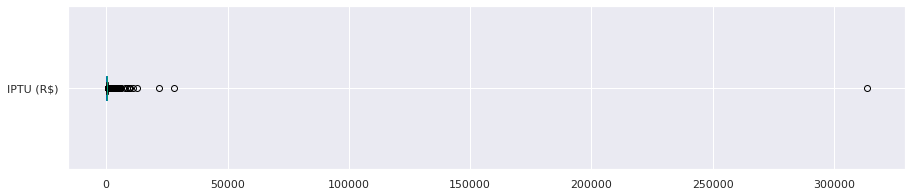

IPTU: valores acima de R$ 4500:
30 entradas
0.2806%


In [144]:
# iptu
df['IPTU (R$)'].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de R$ 4500 para iptu
print("IPTU: valores acima de R$ 4500:")
print("{} entradas".format(len(df[df['IPTU (R$)'] > 4500])))
print("{:.4f}%".format((len(df[df['IPTU (R$)'] > 4500]) / df.shape[0])*100))

Agora conseguimos visualizar quais são os *outliers* que estão prejudicando a visualização correta dos dados. **Assim, opta-se, no âmbito desta análise, remover tais dados**.

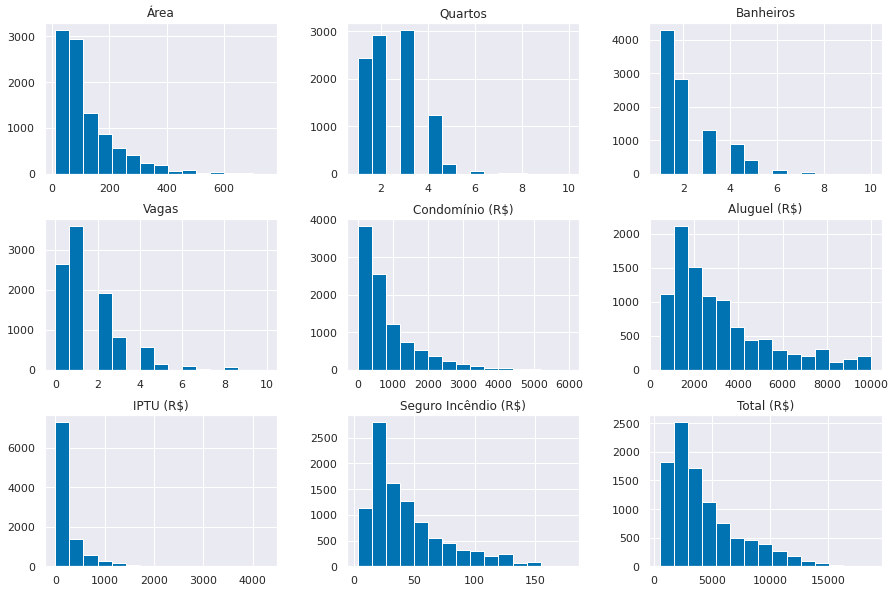

In [145]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.Área > 750].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['Condomínio (R$)'] > 6000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['Aluguel (R$)'] > 10000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['IPTU (R$)'] > 4500].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Bem, agora os dados parecem estar mais afinados e com melhor visualização. Posto isto, um teste que podemos fazer agora é uma correlação, o que significa verificar se existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis. Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [146]:
# criar uma matriz de correlação
corr = df_clean[['Área', 'Quartos', 'Banheiros', 'Andar',
    'Condomínio (R$)', 'Aluguel (R$)', 'IPTU (R$)', 'Seguro Incêndio (R$)', 'Total (R$)']].corr()

display(corr)

,Área,Quartos,Banheiros,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
Área,1.000000,0.724344,0.771808,0.305387,0.659764,0.618348,0.703096,0.660935
Quartos,0.724344,1.000000,0.719375,0.288237,0.534131,0.484562,0.561989,0.544997
Banheiros,0.771808,0.719375,1.000000,0.410575,0.655226,0.605586,0.666415,0.686429
Condomínio (R$),0.305387,0.288237,0.410575,1.000000,0.446450,0.545543,0.348532,0.694258
Aluguel (R$),0.659764,0.534131,0.655226,0.446450,1.000000,0.556026,0.983104,0.948194
IPTU (R$),0.618348,0.484562,0.605586,0.545543,0.556026,1.000000,0.539050,0.701064
Seguro Incêndio (R$),0.703096,0.561989,0.666415,0.348532,0.983104,0.539050,1.000000,0.905094
Total (R$),0.660935,0.544997,0.686429,0.694258,0.948194,0.701064,0.905094,1.000000


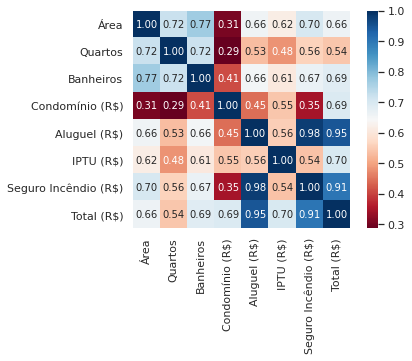

In [147]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

O HeatMap mapeia os valores de uma matriz usando cores, isso pode facilitar a identificação de variáveis correlacionadas quando se tem muitas variáveis, como é o caso. Feitas estas alterações no *Dataframe*, vamos agora traçar algumas relações entre as variáveis. Para inciar essa investigação, proponho analisar a distribuição dos dados por cidade.

In [148]:
# Mostrar porcentagem de observações para cada cidade
df_clean.Cidade.value_counts(normalize=True)

São Paulo         0.535354
Rio de Janeiro    0.145455
Porto Alegre      0.117778
Belo Horizonte    0.116970
Campinas          0.084444
Name: Cidade, dtype: float64

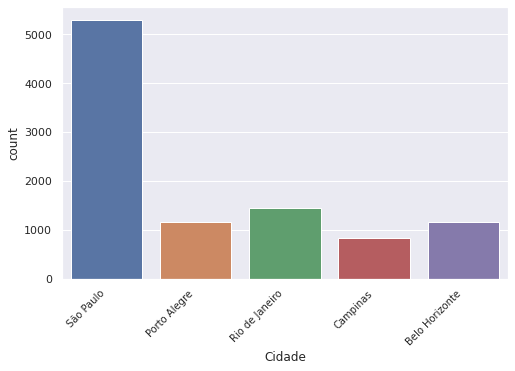

In [149]:
# Gráfico de contagem de observações por cidade
fig, ax = plt.subplots(figsize=(8,5))
plt.xticks(rotation=45, fontsize=10, ha='right')
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Cidade", data=df_clean)

**Conclusão:** Verifica-se que a maioria dos dados se concentram na cidade de São Paulo.

###Perguntas

Antes de nos aprofundarmos na análise propriamente dita, cabe destacar que a análise de dados objetiva encontrar *insights* interessantes e quanto mais perguntas fazemos, mais *insights* conseguimos obter. Por este motivo, vamos estabelecer algumas perguntas que tornarão a análise mais objetiva:

* Como o valor total é distribuído?
* Como o valor do aluguel é distribuído?
* Qual a relação entre o número de quartos e o aluguel?
* Como é a receptividade de animais de estimação?
* Qual a relação entre as cidades e a quantidade de quartos?
* Qual a relação entre cidades e o valor de aluguel?
* As pessoas estão procurando por mais banheiros?
* Qual o andar mais procurado para um imóvel?
* O mobiliário impacta no aluguel?
* Qual é a relação entre as vagas de estacionamento e o aluguel total?
* Qual a relação do seguro contra incêndio e o aluguel?
* Qual o impacto do IPTU no aluguel? 

Por fim, criaremos um modelo de machine learning para realizar análises preditivas.

###Respostas

####Como o valor total é distribuído?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


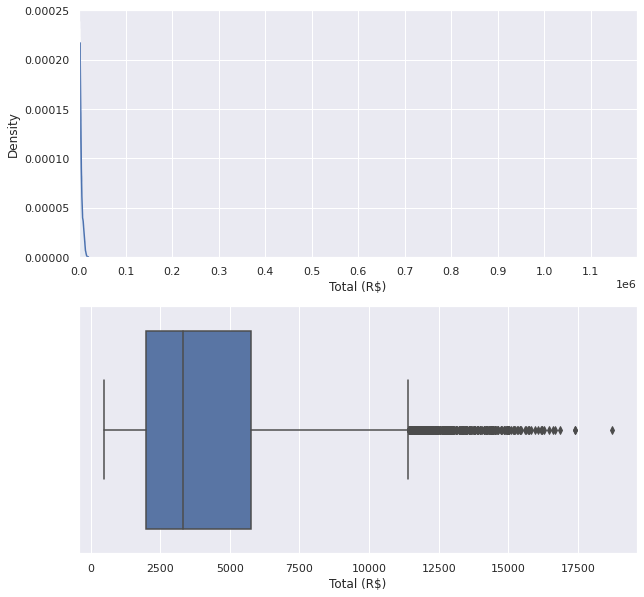

In [150]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
ax = sns.distplot(df_clean['Total (R$)'],kde =True)
ax.set_xlim(0,1200000)
ax.set_xticks(range(499,1200000,100000))
plt.subplot(2, 1, 2)
sns.boxplot(df_clean['Total (R$)']);

**Conclusão:**
1. Distribuição inclinada para a direita*
2. Os *outliers* se potencializam em valores acima de 11250 reais
3. A maioria dos valores está dentro do intervalo 499-100000 reais

`*a média e a mediana são ambos maiores do que a moda`

####Como o valor do aluguel é distribuído?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


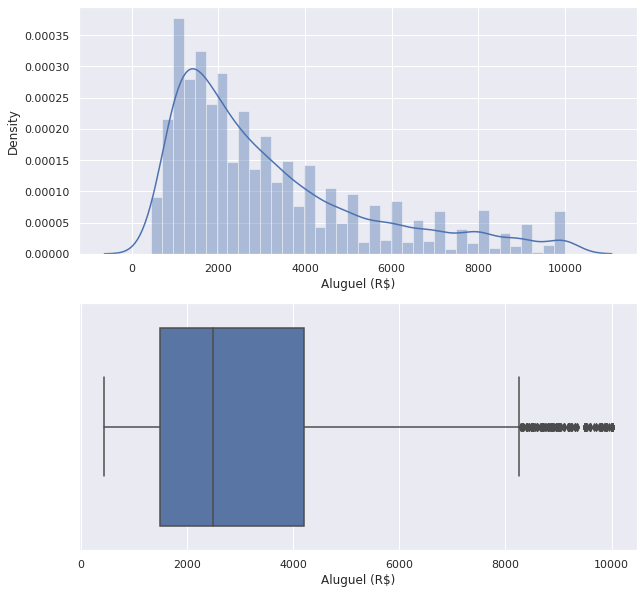

In [151]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
ax = sns.distplot(df_clean['Aluguel (R$)'],kde =True)
plt.subplot(2, 1, 2)
sns.boxplot(df_clean['Aluguel (R$)'])

**Conclusão:** 
* Distribuição inclinada para a direita
* Existem potenciais *outliers* acima de 8.000 reais
* O aluguel mínimo é de 450 reais
* O aluguel máximo é de 45.000 reais*

`*antes da limpeza feita`

####Qual a relação entre o número de quartos e o aluguel?

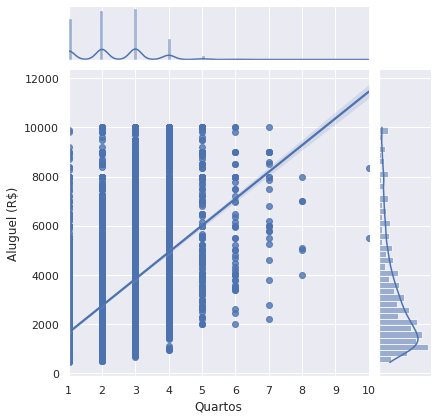

In [152]:
sns.jointplot(y= df_clean['Aluguel (R$)'],x = df_clean['Quartos'],kind ='reg');

**Conclusão:** Interessante notar que o número de quartos tem um considerável impacto no aluguel e também é surpreendente ver que o aluguel mais elevado é atribuído a um imóvel com 3 quartos*.

`*antes da limpeza feita`

####Como é a receptividade de animais de estimação?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


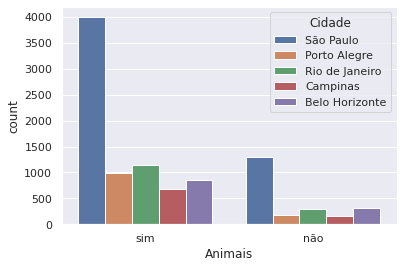

In [153]:
sns.countplot(df_clean['Animais'],hue = df_clean['Cidade']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


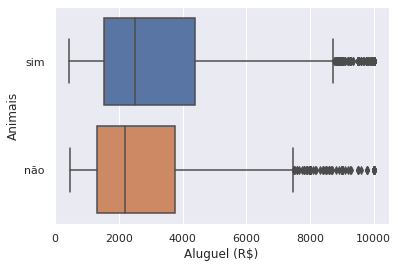

In [154]:
sns.boxplot(df_clean['Aluguel (R$)'],y =df_clean['Animais']);

**Conclusão:** São Paulo demonstra ser uma cidade mais consciente a repeito da inclusão dos animais de estimação, mas também não podemos desconsiderar que nosso dataset tem mais dados desta cidade. Por isso, é interessante notar que as demais cidades também estão aceitando bem os animais e, se traçarmos a proporção de aceitação de animais nos imóveis, chegaremos a razão de 70/30. Complementarmente, cabe destacar que, todavia, os imóveis que permitem animais de estimação são mais caros do que aqueles que não permitem, por isso podemos especular que há sim alguma relação entre a aceitação dos animais e o aluguel total.

####Qual a relação entre as cidades e a quantidade de quartos?

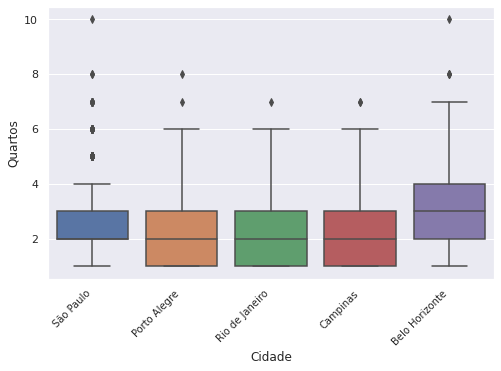

In [155]:
fig, ax = plt.subplots(figsize=(8,5))
plt.xticks(rotation=45, fontsize=10, ha='right')
sns.set_theme(style="darkgrid")
sns.boxplot(x='Cidade', y='Quartos', data=df_clean);

**Conclusão:**
* Rio de Janeiro é a cidade que possui o máximo 12 quartos em uma casa*
* São Paulo e Belo Horizonte tem até 10 cômodos
* Campinas tem até 7 casas quartos

`*antes da limpeza feita`

####Qual a relação entre cidades e o valor de aluguel?

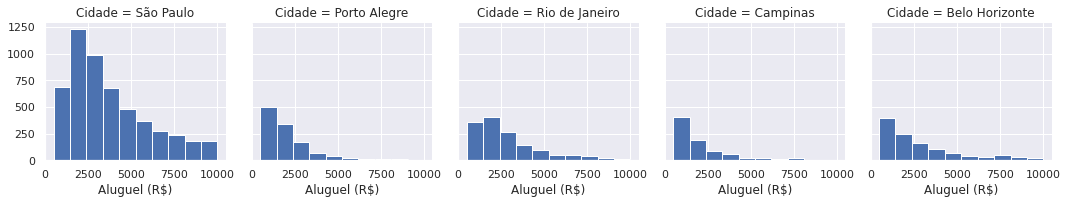

In [156]:
g = sns.FacetGrid(df_clean, col='Cidade')
g = g.map(plt.hist,'Aluguel (R$)')

**Conclusão:** 
* Os resultados levam a entender que em São Paulo há grande variedade de oferta por aluguel de imóveis, como nosso dataset tem mais dados desta cidade do que em comparação às demais, é dificil entender o real cenário.
* Campinas parece ter menos imóveis para locação.

####As pessoas estão procurando por mais banheiros?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


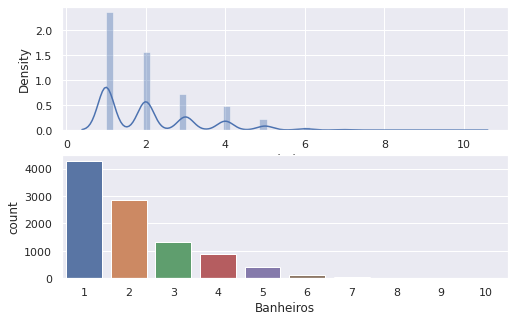

In [157]:
fig, ax = plt.subplots(figsize=(8,5))
plt.xticks(rotation=45, fontsize=10, ha='right')
sns.set_theme(style="darkgrid")
plt.subplot(2,1,1)
sns.distplot(df_clean['Banheiros'])
plt.subplot(2,1,2)
sns.countplot(df_clean['Banheiros']);

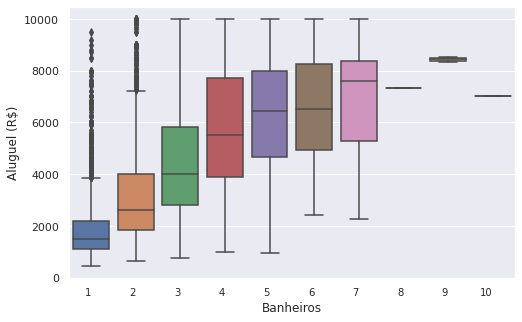

In [158]:
fig, ax = plt.subplots(figsize=(8,5))
plt.xticks(rotation=0, fontsize=10, ha='right')
sns.set_theme(style="darkgrid")
sns.boxplot(x ='Banheiros', y ='Aluguel (R$)', data = df_clean);

**Conclusão:** Incrivelmente, não!!! Na maioria das vezes, os locatários procuram apenas um ou dois banheiros, sem querer desconsiderar que há também um grande número de pessoas que preferem (3-5) banheiros, porém são muito poucas as pessoas que procuram mais de 5 banheiros. 

**Fato interessante:** *O aluguel mais caro é o do imóvel com 7 banheiros!*

####Qual o andar mais procurado para um imóvel?

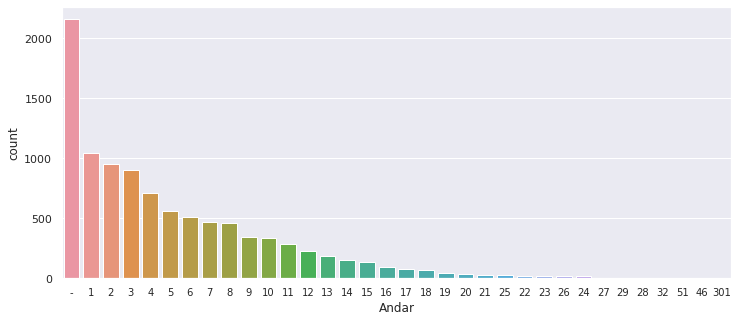

In [159]:
fig, ax = plt.subplots(figsize=(12,5))
plt.xticks(rotation=0, fontsize=10, ha='center')
sns.set(style='darkgrid')
sns.countplot(x = 'Andar',
              data = df_clean,
              order = df_clean['Andar'].value_counts().index)
plt.show()

**Conclusão:** Verifica-se que a maioria dos imóveis cadastrados não informa um número de andares, bem como existem cadastros que consideram o número de andares em uma única residência, enquanto outros informar em qual andar o imóvel se encontra. Por isso, esta análise é equivocada no âmbito deste dataset. Desconsiderando isso, é engraçado perceber que mesmo com a limpeza dos dados, ainda aparecem andares como 51 ou 301.

####O mobiliário impacta no aluguel?

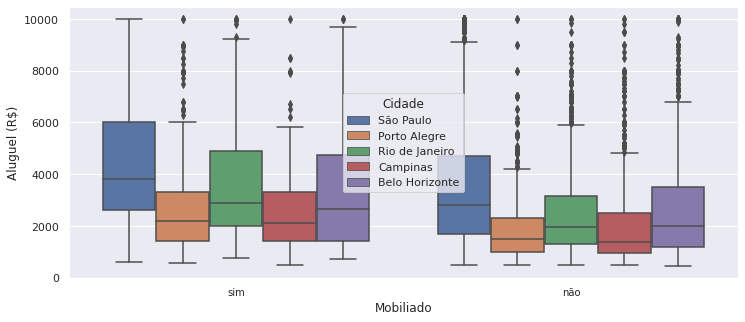

In [160]:
fig, ax = plt.subplots(figsize=(12,5))
plt.xticks(rotation=0, fontsize=10, ha='center')
sns.set(style='darkgrid')
sns.boxplot(x ='Mobiliado', y ='Aluguel (R$)', data = df_clean,hue ='Cidade');

**Conclusão:** 
* Imóveis não mobiliados são mais caros!
* São Paulo é a cidade com mais imóveis não mobiliados

####Qual é a relação entre as vagas de estacionamento e o aluguel total?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


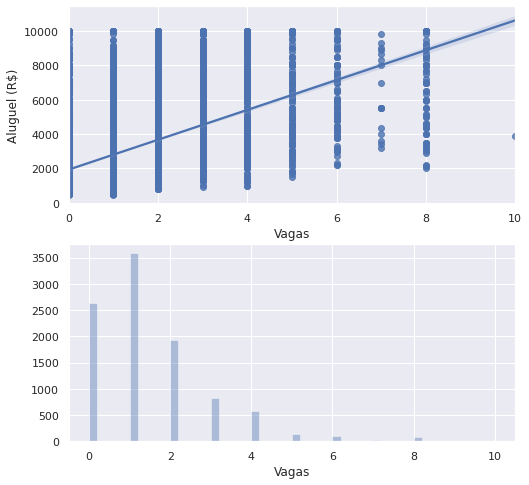

In [161]:
plt.figure(figsize =(8,8))
plt.subplot(2,1,1)
ax = sns.regplot(df_clean['Vagas'], df_clean['Aluguel (R$)'])
plt.subplot(2,1,2)
sns.distplot(df_clean['Vagas'],kde =False);

**Conclusão:** Há pouca correlação entre as vagas de estacionamento e o valor do aluguel, todavia a maioria das pessoas está escolhendo imóveis com 0 a 2 vagas de estacionamento.

####Qual a relação do seguro contra incêndio e o aluguel?

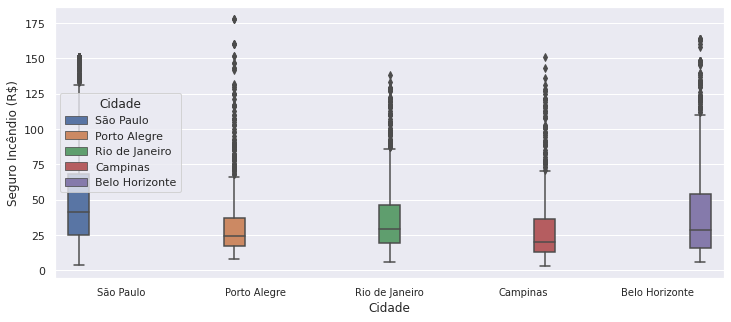

In [162]:
fig, ax = plt.subplots(figsize=(12,5))
plt.xticks(rotation=0, fontsize=10, ha='center')
sns.set(style='darkgrid')
sns.boxplot(x='Cidade', y='Seguro Incêndio (R$)', data=df_clean,hue ='Cidade');

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


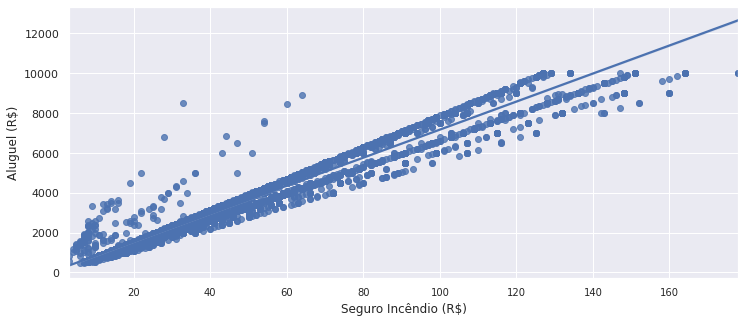

In [163]:
fig, ax = plt.subplots(figsize=(12,5))
plt.xticks(rotation=0, fontsize=10, ha='center')
sns.set(style='darkgrid')
ax = sns.regplot(df_clean['Seguro Incêndio (R$)'],df_clean['Aluguel (R$)'])

**Conclusão:** Em média, São Paulo é a cidade com maior valor de seguro contra incêndio seguida por Rio de Janeiro, Belo Horizonte, Porto Alegre e Campinas. Importante observar que há uma correlação muito alta entre o valor do seguro contra incêndio e o valor do aluguel, se o seguro contra incêndio for maior, o aluguel também será maior e vice-versa.

####Qual o impacto do IPTU no aluguel?

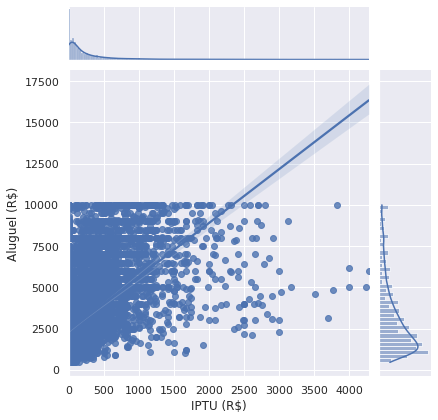

In [164]:
sns.jointplot(y=df_clean['Aluguel (R$)'], x=df_clean['IPTU (R$)'],kind ='reg');

**Conclusão:** Pelo gráfico fica claro que o valor do IPTU não apresenta nenhum impacto direto no valor do aluguel.

## **Análise Preditiva de Aluguel**

Vamos agora iniciar o desenvolvimento de um sistema de Machine Learning para a análise preditiva de alugueis baseado nos dados tratados. Iniciaremos, então, adaptando nosso dataframe para as necessidades do modelo.

In [165]:
# Selecionando as colunas a serem trabalhadas
colunas_selecionadas = ['Seguro Incêndio (R$)','Vagas','Aluguel (R$)','Quartos','Total (R$)','Cidade','Mobiliado','Animais']
data_x = df_clean[colunas_selecionadas]

In [166]:
# Função para categorizar as colunas
def cat_to_num(data_x,col):
    dummy = pd.get_dummies(data_x[col])
    del dummy[dummy.columns[-1]]#Para evitar armadilha de variável fictícia
    data_x= pd.concat([data_x,dummy],axis =1)
    return data_x

In [167]:
# Função para automatizar a categorização
for i in data_x.columns:
    if data_x[i].dtype == object:
        print(i)
        data_x =cat_to_num(data_x,i)

Cidade
Mobiliado
Animais


In [168]:
data_x.drop(['Cidade','Mobiliado','Animais'],axis =1,inplace =True)

In [169]:
# Descrição estatística dos dados sobre os quais faremos análises preditivas
data_x.describe()

,Seguro Incêndio (R$),Vagas,Aluguel (R$),Quartos,Total (R$),Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,não,não
count,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.00000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000
mean,43.534545,1.448081,3192.740202,2.404949,4299.469697,0.11697,0.084444,0.117778,0.145455,0.764646,0.225758
std,31.706343,1.447269,2268.365627,1.114043,3076.225153,0.32140,0.278067,0.322361,0.352576,0.424241,0.418101
min,3.000000,0.000000,450.000000,1.000000,499.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,1500.000000,2.000000,1981.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,33.000000,1.000000,2500.000000,2.000000,3304.500000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,4200.000000,3.000000,5754.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
max,178.000000,10.000000,10000.000000,10.000000,18710.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
# Separando o dataframe para treina-los
y = data_x['Aluguel (R$)']
x = data_x.drop(['Aluguel (R$)'],axis =1)

In [171]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(x,y,test_size =0.3)

Vamos agora avaliar qual o melhor metodo de análise preditiva de aluguel usando:

* Decision Tree Regression
* Random Forest Regression
* Linear Regression
* SVM Regression
* K Nearest Neighbour Regression
* Lasso Regression
* Ridge Regression

In [172]:
# Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importando modelos
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [173]:
# Vamos criar uma lista para armazenar todos os resultados para posterior visualização
acc = []
# parameters1 serão os alfas que usaremos para realizar o GridSearch
parameters1= [{'alpha': [0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
# nos regressores, definiremos os modelos que queremos usar
regressors = {'Linear Regression': LinearRegression(),
              'Ridge Model': Ridge(alpha=0.1),
              'Decision Tree': DecisionTreeRegressor(),
              'Random Forest': RandomForestRegressor(random_state=1),
              'SVR': SVR(),
              'KNN': KNeighborsRegressor(),
              'Lasso': Lasso(),
              'GridSearchRidge': GridSearchCV(Ridge(), parameters1, cv=4),
              'GridSearchLasso': GridSearchCV(Lasso(), parameters1, cv=4)
             }

In [174]:
# Agora fazemos um loop com cada regressor para realizar o modelo, prever o aluguel e extraimos as métricas
for i in regressors:
    model = regressors.get(i)
    if i == 'GridSearchRidge' or i == 'GridSearchLasso':
        model.fit(X_train, y_train).best_estimator_ 
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(i)
    print('MAE:', mean_absolute_error(y_test, prediction))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
    print('R2:', r2_score(y_test, prediction))
    print('*' * 40)
    acc.append([i, mean_absolute_error(y_test, prediction), np.sqrt(mean_squared_error(y_test, prediction)), r2_score(y_test, prediction)])

Linear Regression
MAE: 149.44943462072254
RMSE: 247.67297392809095
R2: 0.9878814228753388
****************************************
Ridge Model
MAE: 149.44689969603
RMSE: 247.6726955248879
R2: 0.9878814501197226
****************************************
Decision Tree
MAE: 57.227072310405646
RMSE: 232.23304462429192
R2: 0.9893452705836323
****************************************
Random Forest
MAE: 53.89448821234882
RMSE: 189.29192809661782
R2: 0.9929212172646709
****************************************
SVR
MAE: 949.8739754461611
RMSE: 1527.00127356387
R2: 0.5393477553325172
****************************************
KNN
MAE: 239.94101010101008
RMSE: 417.00254822433544
R2: 0.965646435093482
****************************************
Lasso
MAE: 148.48690951073465
RMSE: 247.65163677013325
R2: 0.9878835108290787
****************************************
GridSearchRidge
MAE: 149.20934626186656
RMSE: 247.65013548055137
R2: 0.9878836577314296
****************************************
GridSearchLasso
M

In [175]:
# Vamos classificar nossa lista de resultados e transformá-la em um dataframe
acc.sort(key = lambda y:y[3],reverse =True)
acc = pd.DataFrame(data = acc, columns=['model', 'MAE', 'RMSE', 'R2'])
acc.head(len(regressors))

,model,MAE,RMSE,R2
0,Random Forest,53.894488,189.291928,0.992921
1,Decision Tree,57.227072,232.233045,0.989345
2,GridSearchRidge,149.209346,247.650135,0.987884
3,Lasso,148.486910,247.651637,0.987884
4,GridSearchLasso,149.339307,247.655299,0.987883
5,Ridge Model,149.446900,247.672696,0.987881
6,Linear Regression,149.449435,247.672974,0.987881
7,KNN,239.941010,417.002548,0.965646
8,SVR,949.873975,1527.001274,0.539348


Como o **Random Forest Regression** está no topo da lista, o usaremos para condizir a confeccção do nosso modelo final.

In [176]:
from sklearn.ensemble import RandomForestRegressor as regr
model =regr()
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


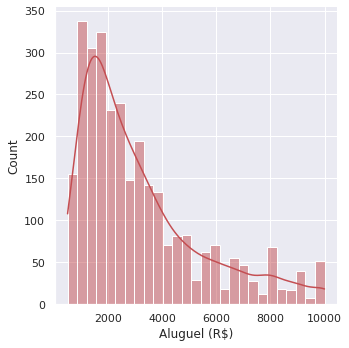

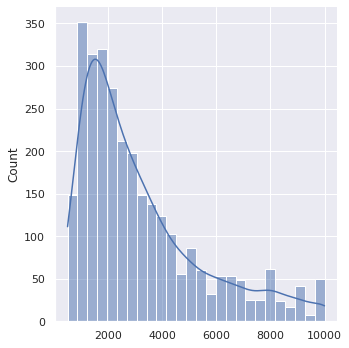

In [177]:
# Comparando o valor real e o valor estimado pelo modelo
ax1 = sns.displot(y_test,kde =True,color ="r",label ="Valor Atual")
sns.displot(model.predict(X_test),color ="b",kde =True, label = "Valor Estimado",ax =ax1);

**Conclusão:** A sobreposição de duas curvas revela a maior precisão do nosso modelo (99,54%).